The boiling point of water is 373.14K
The boiling point of ammonia is 239.66K


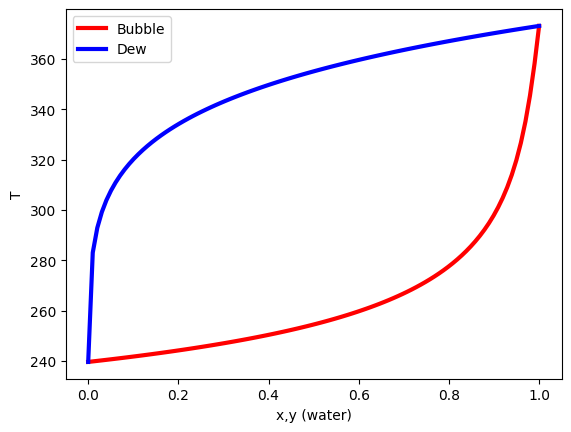

In [1]:
import numpy as np

from scipy.integrate import quad
from scipy.optimize import root
import matplotlib.pyplot as plt
%matplotlib inline 
#plot graph inline
Patm=1.01 
bp = lambda T,a,b,c: Patm - 10**(a-((b)/(T+c)))#boilingpt eq
Raoult= lambda T,x,a1,b1,c1,a2,b2,c2: Patm - x*10**(a1-((b1)/(T+c1))) -(1-x)*10**(a2-((b2)/(T+c2))) #Raoult's law eq for bp 
dpeq= lambda T,y,a1,b1,c1,a2,b2,c2: (1/Patm) - (y/10**(a1-((b1)/(T+c1)))) - ((1-y)/10**(a2-((b2)/(T+c2)))) #Eq for dp
def antoine(element1,p1,element2,p2):
    a1,b1,c1=p1
#Unpack element parameters into antoine constants
    a2,b2,c2=p2
    bp1=round(root(bp,x0=300,args=(a1,b1,c1)).x[0],2)
#Calculate bp
    bp2=round(root(bp,x0=300,args=(a2,b2,c2)).x[0],2)
    print('The boiling point of '+element1+' is '+str(bp1)+'K')
    print('The boiling point of '+element2+' is '+str(bp2)+'K')
    N=100
#Plot 100 pts
    h=np.linspace(0,1,N)
    bubble,dew=h*0,h*0
    for i in range(N):
        bubble[i]=root(Raoult,x0=300,args=(h[i],a1,b1,c1,a2,b2,c2)).x[0]
#Calc the bp with Raoult's Law
        dew[i]=root(dpeq,x0=300,args=(h[i],a1,b1,c1,a2,b2,c2)).x[0]
#Calc the dp
    plt.plot(h,bubble,'r',lw=3,label='Bubble')
#Plot
    plt.plot(h,dew,'b',lw=3,label='Dew')
    plt.legend(loc='upper left')
    plt.xlabel('x,y (water)')
    plt.ylabel('T')
    plt.show()
    return None
water = [5.11564 , 1687.537 , -42.98]
ammonia = [ 4.48540 , 926.132 , -32.98]
antoine('water',water,'ammonia',ammonia)